## Programming for Data Analysis Assignment 2018 - :

### Cleaning and editing the real-world dataset


To be able to model and therefore  predict the distribution of grades for graduates in a given year based on:

Number of estimated graduates by:

Number of expected graduates:

LC points range at point of entry
College/Sector
Type of School (DEIS/Fee-paying)
Field of Study (Broad)
Gender

Restricted to Honours degree Graduates only

Potential real-life applications

Estimating the work readiness of graduates and the flow into employment (2:1) and post-graduate study (1st)

For non-completion and low attainment (lower that 2:1, bare pass or non-completion), the provision of adequate post-entry supports; revision of entry requirements (on a course by course basis). 


Limits of the study: for a like for like comparison, Level 8 honours degree students only. L6/L7 would require a seperate study.

This does not taken into account students cultual or social economic background, or if the student had a disability (includ. It is suggested that a more appropriate approach would be to do a macro study of all students and a seperate study of students from minority or under-represented groups and compare paterns of entry, progression/completion and attainment against this of the various sub-groups and if there are any deviations, disgnose what interventions need to be made on their behalf (if any)


Part 1 and 2 will involve the investigation of actual real-life data. This will be done in two stages:

(1) preparation of source dataset
(2) Investigation of dataset:

Particularly:

Breakdown (%s) of graduates based on 

Sector:
Field of study:
Gender:
LC points range or highest level of qualification:
Type of school attended:

Part 3 will then devise an algorthm that, based on an inputted number (ideally a reasonbable estimate of the number of Honours Degree Graduates in a given year, will be able to simulate the distribution of grades among this population


While not a core learnign objective of this project, this project will allow me to use pandas as an alternatve to excel 

Read data from an excel worksheet
* Count number of observations
* Identify and remove duplicates
* Remove rows where data in specified columns
* Remove columns
* Replace values in columns



Initial research:

I will need to investigate actual 



(1) SRS Query - Graduates

Student id
Academic Year
Gender Long
Non Standard Award Desc
Institute Type
Institute
Isced Broad Desc
Grade Desc


(2) SRS Query - Entrants

Student id
Number of Students
Academic Year = 2012/13 and 2014/15
Gender Long
LC Points Range 1
LC Points Range 2
DEIS_OR_FEE_PAYING_DESC
High Qual Desc
Age Group
Institute
Institute Type
Progtype Desc
Isced Broad Desc

(3) in Excel, crossrefrenced 


The aim of this project will be to investigate a dataset of students entering in the years 2012 and 2013 and graduating in 2017. Specifically, for Honours degrees, I want to investagate the distribution of final grades and see if there is a link between final grade achived and other factors, for example, gender, type of school previously attended, age on entry (?) and LC points. The idea is to see if the dgrade distributions as a whol or for sunbgroups of entrants can be modelled by one of the more commonly used distributions used in the social sciences (e.g. pareto, do only 20% of students get a first, etc).

The final part of the exercise will attempt to model the future distribution of grades for 2018 or 2019, based on an estimate of students predicted to graduate in these years ...



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import as data_frame df, the dataset in the Graduates worksheet of the 'Graduates 2017 - Excel' excel workbook.
# As per default setting of the read_excel method, the first line will be 


df = pd.read_excel('Graduates2017 - Excel.xlsx', 'Graduates')
df.head()

,ALT Student id,Year of Entry,Gender Long,LC Points Range 1,LC Points Range 2,DEIS_OR_FEE_PAYING_DESC,High Qual Desc,Age Group,Institute,Institute Type,Progtype Desc,Year of Graduation,Non Standard Award Desc,Field of Study,Grade Desc,Score,Number of years,Institute Alternative Name
0,AD-12360856,2012/2013,Female,305 to <355,medium points,Neither,NaN,19,National College of Art and Design,Colleges,Undergraduate Honours Degree,2017,Undergraduate Honours Degree,Arts and humanities,2nd Class Honours (Grade 2),54.5,4,College 5
1,AD-12375986,2012/2013,Female,305 to <355,medium points,Neither,NaN,18,National College of Art and Design,Colleges,Undergraduate Honours Degree,2017,Undergraduate Honours Degree,Arts and humanities,2nd Class Honours (Grade 2),54.5,4,College 5
2,AD-12420552,2012/2013,Female,405 to <455,high points,Neither,NaN,19,National College of Art and Design,Colleges,Undergraduate Honours Degree,2017,Undergraduate Honours Degree,Arts and humanities,1st Class Honours,85.0,4,College 5
3,AD-12444362,2012/2013,Male,455 to <505,high points,Neither,NaN,19,National College of Art and Design,Colleges,Undergraduate Honours Degree,2017,Undergraduate Honours Degree,Arts and humanities,2nd Class Honours (Grade 2),54.5,4,College 5
4,AD-12500127,2012/2013,Female,205 to <255,medium points,Neither,NaN,22,National College of Art and Design,Colleges,Undergraduate Honours Degree,2017,Undergraduate Honours Degree,Arts and humanities,Pass,44.5,4,College 5


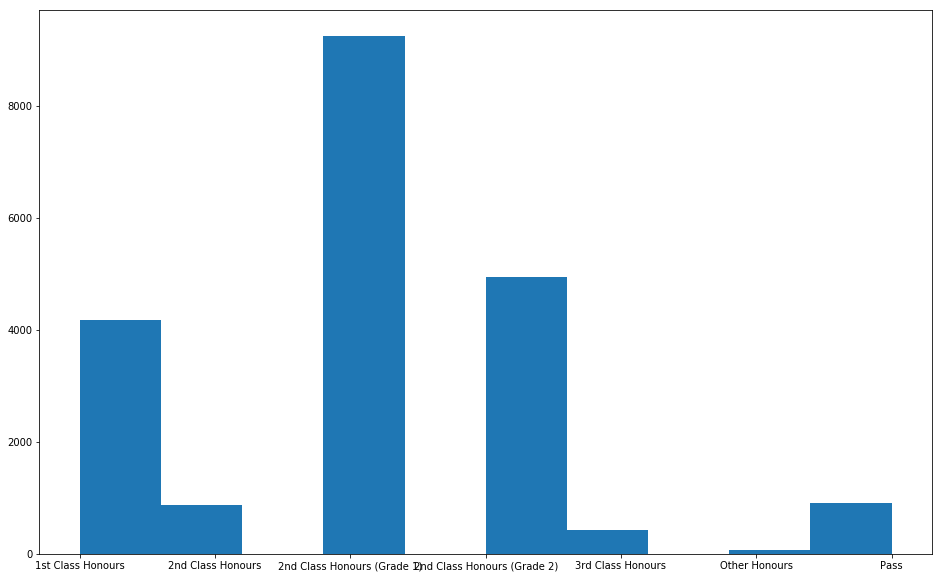

In [3]:
plt.figure(figsize=(16, 10))
plt.hist(df['Grade Desc'])
plt.show()

In [15]:
df.count()

ALT Student id                20643
Year of Entry                 20643
Gender Long                   20643
LC Points Range 1             17630
LC Points Range 2             13802
DEIS_OR_FEE_PAYING_DESC       20643
High Qual Desc                15292
Age Group                     20643
Institute                     20643
Institute Type                20643
Progtype Desc                 20643
Year of Graduation            20643
Non Standard Award Desc       20643
Field of Study                20643
Grade Desc                    20643
Score                         20643
Number of years               20643
Institute Alternative Name    20643
dtype: int64

In [4]:
df['Grade Desc'].value_counts()

2nd Class Honours (Grade 1)    9243
2nd Class Honours (Grade 2)    4940
1st Class Honours              4170
Pass                            914
2nd Class Honours               877
3rd Class Honours               429
Other Honours                    70
Name: Grade Desc, dtype: int64

In [28]:
df.groupby(['Institute Type', 'Institute', 'Field of Study', 'LC Points Range 2', 'Grade Desc']).count()

ALT Student id  \
Institute Type Institute                          Field of Study                                    LC Points Range 2 Grade Desc                                    
Colleges       Mary Immaculate College, Limerick  Arts and humanities                               high points       1st Class Honours                         5   
                                                                                                                      2nd Class Honours (Grade 1)              37   
                                                                                                                      2nd Class Honours (Grade 2)              33   
                                                                                                                      3rd Class Honours                         5   
                                                                                                    medium points     1st Class Honours                         1   
                                                                                                                      2nd Class Honours (Grade 1)              21   
                                                                                                                      2nd Class Honours (Grade 2)              31   
                                                                                                                      3rd Class Honours                        14   
                                                  Education                                         high points       1st Class Honours                        62   
                                                                                                                      2nd Class Honours (Grade 1)             232   
                                                                                                                      2nd Class Honours (Grade 2)              89   
                                                                                                                      3rd Class Honours                        14   
                                                                                                    medium points     2nd Class Honours (Grade 1)              11   
                                                                                                                      2nd Class Honours (Grade 2)              15   
                                                                                                                      3rd Class Honours                         1   
               National College of Art and Design Arts and humanities                               high points       1st Class Honours                         3   
                                                                                                                      2nd Class Honours (Grade 2)               2   
                                                                                                    low points        2nd Class Honours (Grade 1)               1   
                                                                                                                      2nd Class Honours (Grade 2)               1   
                                                                                                    medium points     2nd Class Honours (Grade 1)               6   
                                                                                                                      2nd Class Honours (Grade 2)               7   
                                                                                                                      3rd Class Honours                         1   
                                                                                                                      Pass                                      1   
                      

In [5]:
df['ALT Student id'].nunique()

20527

In [6]:
# identify duplicates 

ids = df["ALT Student id"]
df[ids.isin(ids[ids.duplicated()])].count()


ALT Student id                232
Year of Entry                 232
Gender Long                   232
LC Points Range 1             157
LC Points Range 2             133
DEIS_OR_FEE_PAYING_DESC       232
High Qual Desc                129
Age Group                     232
Institute                     232
Institute Type                232
Progtype Desc                 232
Year of Graduation            232
Non Standard Award Desc       232
Field of Study                232
Grade Desc                    232
Score                         232
Number of years               232
Institute Alternative Name    232
dtype: int64

In [7]:
# Remove duplicate
# sort dataset by alt id, then by  year
df.sort_values(['ALT Student id', 'Year of Entry'])
# make new dataframe with duplicate entries for the same students removed, keeping only the last entry (i.e year of entry 2013/14)
df = df.drop_duplicates(subset='ALT Student id', keep='last', inplace=False)


df['ALT Student id'].count()
# Drop following columns from dataset: 
# Institute - we will use anonymised institute instead 
# Progtype Desc (i.e the programme they entered in, which may be different to an honours degree. no longer considered relevant
# but with the removal of the duplicate IDs, no longer considered relevant)
# Alt Student ID - No longer relevant since duplicates removed - we are satisfied that each record is unique.
df = df.drop(columns=['ALT Student id', 'Institute', 'Progtype Desc'])
df.head()


,Year of Entry,Gender Long,LC Points Range 1,LC Points Range 2,DEIS_OR_FEE_PAYING_DESC,High Qual Desc,Age Group,Institute Type,Year of Graduation,Non Standard Award Desc,Field of Study,Grade Desc,Score,Number of years,Institute Alternative Name
0,2012/2013,Female,305 to <355,medium points,Neither,NaN,19,Colleges,2017,Undergraduate Honours Degree,Arts and humanities,2nd Class Honours (Grade 2),54.5,4,College 5
1,2012/2013,Female,305 to <355,medium points,Neither,NaN,18,Colleges,2017,Undergraduate Honours Degree,Arts and humanities,2nd Class Honours (Grade 2),54.5,4,College 5
2,2012/2013,Female,405 to <455,high points,Neither,NaN,19,Colleges,2017,Undergraduate Honours Degree,Arts and humanities,1st Class Honours,85.0,4,College 5
3,2012/2013,Male,455 to <505,high points,Neither,NaN,19,Colleges,2017,Undergraduate Honours Degree,Arts and humanities,2nd Class Honours (Grade 2),54.5,4,College 5
4,2012/2013,Female,205 to <255,medium points,Neither,NaN,22,Colleges,2017,Undergraduate Honours Degree,Arts and humanities,Pass,44.5,4,College 5


In [8]:
df = df[df['Grade Desc'] != 'Other Honours'] # remove "other honours" - unclear how to treat 
df = df[df['Grade Desc'] != '2nd Class Honours'] # remove undifferentiated second class honours. 
df.count()

Year of Entry                 19581
Gender Long                   19581
LC Points Range 1             17265
LC Points Range 2             13557
DEIS_OR_FEE_PAYING_DESC       19581
High Qual Desc                14514
Age Group                     19581
Institute Type                19581
Year of Graduation            19581
Non Standard Award Desc       19581
Field of Study                19581
Grade Desc                    19581
Score                         19581
Number of years               19581
Institute Alternative Name    19581
dtype: int64

In [9]:
# Replacing grades with average or median mark

# df = df.replace('1st Class Honours', '85')
# df = df.replace('2nd Class Honours (Grade 1)', '64.5')
# df = df.replace('2nd Class Honours (Grade 2)', '54.5 ')
# df = df.replace('3rd Class Honours', '3rd Class Honours')
df = df.replace('Pass', '3rd Class Honours')

# is there a more efficient way of doing this in one command
df.head()

,Year of Entry,Gender Long,LC Points Range 1,LC Points Range 2,DEIS_OR_FEE_PAYING_DESC,High Qual Desc,Age Group,Institute Type,Year of Graduation,Non Standard Award Desc,Field of Study,Grade Desc,Score,Number of years,Institute Alternative Name
0,2012/2013,Female,305 to <355,medium points,Neither,NaN,19,Colleges,2017,Undergraduate Honours Degree,Arts and humanities,2nd Class Honours (Grade 2),54.5,4,College 5
1,2012/2013,Female,305 to <355,medium points,Neither,NaN,18,Colleges,2017,Undergraduate Honours Degree,Arts and humanities,2nd Class Honours (Grade 2),54.5,4,College 5
2,2012/2013,Female,405 to <455,high points,Neither,NaN,19,Colleges,2017,Undergraduate Honours Degree,Arts and humanities,1st Class Honours,85.0,4,College 5
3,2012/2013,Male,455 to <505,high points,Neither,NaN,19,Colleges,2017,Undergraduate Honours Degree,Arts and humanities,2nd Class Honours (Grade 2),54.5,4,College 5
4,2012/2013,Female,205 to <255,medium points,Neither,NaN,22,Colleges,2017,Undergraduate Honours Degree,Arts and humanities,3rd Class Honours,44.5,4,College 5


In [10]:
# Save dataframe as new CSV file - this will become the working file for the next part of the analysis

df.to_csv('GraduateSampleNua2017.csv')